<div style="border:solid Chocolate 2px; padding: 40px">

Привет, меня зовут Александр Куимов. Я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими по шаблону, показанному чуть ниже. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>
Добрый день, Александр! Благодарю за пояснения, ниже я постарался учесть всё тобою сказанное или подробнее пояснить свои действия)
    
    
Здесь приведу список изменений:
    
    - пункт 2.3. Гистограмма поправлена
    
    - пункт 2.4. Добавил подпись возраста
    
    - пункт 3. Пояснил, почему аугментация не была применена
</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

# Определение возраста покупателей

## Описание проекта

### Цель работы 
- Обучить и протестировать нейросеть, определяющую по фотографии возраст человека;
- Достичь значения метрики mean absolute error менее 8 на тестовой выборке.

### Описание данных
Данные взяты с сайта ChaLearn Looking at People. Датасет состоит из таблицы в формате csv, содержащей названия файлов и истинный возраст изображённых на фотографиях лиц, и из каталога с фотографиями. 


## Исследовательский анализ данных

Планируется выполнить осмотр датасета, исключить пропуски, исключить дубликаты в именах файлов, исследовать распределение целевого признака.

### Импорт библиотек

 <div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Вижу твое добавленное описание проекта. Молодец! Это поможет тебе расставлять акценты в выводах.

In [1]:
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

### Загрузка и осмотр датасета

In [2]:
labels = pd.read_csv('/datasets/faces/labels.csv')


In [3]:
labels.info()
labels.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7591 entries, 0 to 7590
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   file_name  7591 non-null   object
 1   real_age   7591 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 118.7+ KB


,file_name,real_age
0,000000.jpg,4
1,000001.jpg,18
2,000002.jpg,80
3,000003.jpg,50
4,000004.jpg,17


In [4]:
(labels['file_name'].value_counts()>1).sum()

0

Пропусков в данных не обнаружено, названия файлов в датасете не повторяются.

### Исследование целевого признака

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Размер выборки выведен. Выборка относительно небольшая, но мы еще можем нарастить ее, применяя аугментации.


In [5]:
labels.describe()

,real_age
count,7591.000000
mean,31.201159
std,17.145060
min,1.000000
25%,20.000000
50%,29.000000
75%,41.000000
max,100.000000


''

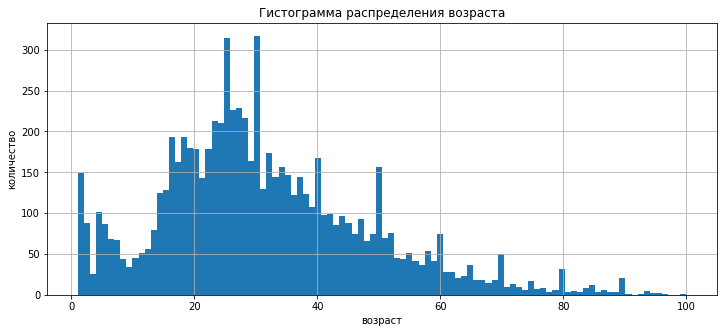

In [16]:
labels.hist(figsize=[12,5],bins=100)
plt.title('Гистограмма распределения возраста')
plt.xlabel('возраст')
plt.ylabel('количество')
;

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b> 
    
Гистограмма целевого признака выведена. Раз у нас 100 различных возрастов, то и корзин можно указать столько же.
        
Пики в районе "юбилейных" лет, они тут могут быть связаны с тем, что настоящий возраст был неизвестен тому, кто размечал датасет, и он попросту округлял его. Важно еще поработать над оформлением ВСЕХ графиков (название осей и самих графиков)
            </div> 
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Спасибо, добавил изменения к гистограмме
        </div>   

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

''

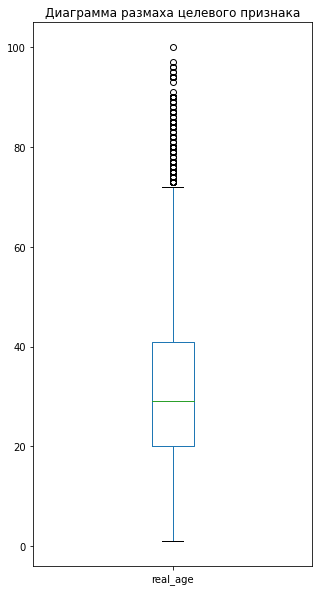

In [7]:
labels['real_age'].plot(kind='box', figsize=[5,10])
plt.title('Диаграмма размаха целевого признака')
;

В выборке присутствуют лица в возрасте от 1 до 100 лет, при этом наиболее представлена возрастная группа от 20 до 40. Медиана возраста составила 29 лет, среднее - 31.2. Возрастная группа старше 75 лет в этой выборке относительно немногочисленна, датасет несколько смещён влево.


### Создание объекта ImageDataGenerator и выгрузка изображений

In [8]:
datagen = ImageDataGenerator(rescale=1./255)
gen_flow = datagen.flow_from_dataframe(
        dataframe=labels,
        directory='/datasets/faces/final_files/',
        x_col='file_name',
        y_col='real_age',
        target_size=(224, 224),
        batch_size=15,
        class_mode='raw',
        seed=12345) 

Found 7591 validated image filenames.


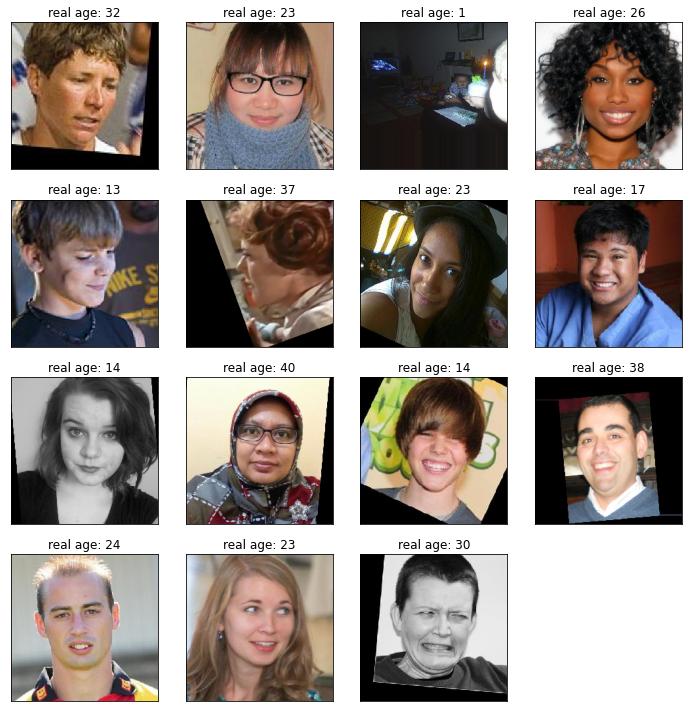

In [15]:
features, target = next(gen_flow)

# выводим 15 изображений
fig = plt.figure(figsize=(10,10))
for i in range(15):
    fig.add_subplot(4, 4, i+1)
    plt.imshow(features[i])
    plt.title('real age: '+ str(target[i]))
# для компактности удаляем оси и прижимаем изображения друг к другу
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Примеры фотографий выведены!
    
Можно еще поработать над оформлением фото, в названиях каждого фото (title) указать возраст.
    </div>    
    
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Спасибо, возраст дописал!
        </div>   

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

В выборке представлены фотографии людей различного возраста, пола и национальности, с разных ракурсов, некоторые изображения повёрнуты на определенный градус. Эти особенности должны положительно сказаться на результатах машинного обучения.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b>
    

        
Добавлю, общая ориентация фотографий примерно одинакова - в некоторых фото их уже повернули за нас, чтобы выровнять положение лица, значит нам их не обязательно поворачивать, а начальный размер изображений отличается, в силу того, что визуально заметно различное качество фото, где-то есть черные рамки (они не несут полезной информации). В итоге, размер изображений мы приведем к единому перед обучением модели.
        
Советую изучить базовые возможности аугментаций в <a href="https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator">документации</a> или в <a href="https://towardsdatascience.com/machinex-image-data-augmentation-using-keras-b459ef87cd22">статье</a>.         
 </div>
    

<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>
Принял. 
        </div>   

## Обучение модели

### Код модели

Ниже представлен код генерации выборок, создания и обучения модели. 



```python
# импорт библиотек
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.metrics import MeanAbsoluteError
import pandas as pd
 

# функция, создающая обучающую выборку
def load_train(path):

    data = pd.read_csv(path+'labels.csv')

    datagen = ImageDataGenerator(rescale=1./255,
                                 validation_split=0.25)
    # методы аугментации обучающей выборки в финальном коде не применяются, т.к. при проверке
    # ухудшали качество модели
    train_datagen_flow = datagen.flow_from_dataframe(
        dataframe=data,
    directory=path+'final_files/',
    x_col='file_name',
    y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',

    subset='training',
    seed=12345)

    return train_datagen_flow


# функция, создающая тестовую выборку
def load_test(path):

    data = pd.read_csv(path+'labels.csv')
    datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

    test_datagen_flow = datagen.flow_from_dataframe(
        dataframe=data,
        directory=path+'final_files/',
        x_col='file_name',
        y_col='real_age',
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw',

    subset='validation',
    seed=12345)

    return test_datagen_flow

# функция, объявляющая модель
def create_model(input_shape=(224, 224, 3)):
    
    # использован "костяк" ResNet50. 
    backbone = ResNet50(input_shape=input_shape,
    weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5', 
                    include_top=False)
    # Исходные веса, предоставленные заказчиком, распологающиеся по указанному выше адресу, позволили
    # повысить качество модели.
    model = Sequential()
    model.add(backbone)
    
    model.add(GlobalAveragePooling2D())

    model.add(Dense(1, activation='relu'))
    # "Верхушка" модели и особенности компиляции, указанные в данном коде, нацелены на решение задачи регрессии.
    
    model.compile(loss='mse', 
              optimizer='adam', metrics=[MeanAbsoluteError()])
    return model


# функция, обучающая и тестирующая модель
def train_model(model, train_data, test_data, epochs=300,
               steps_per_epoch=20, batch_size=None, validation_steps=5):

    model.fit(train_data,
          validation_data=test_data,
          batch_size=batch_size,
          epochs=epochs,
          steps_per_epoch=steps_per_epoch,

          validation_steps=validation_steps,
          verbose=2) 
    return model

```

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

Модель определена правильно!
        
- Желательно еще добавить горизонтальный флип в аргумент `ImagedataGenerator()`, НО только на тренировочной части. По сути это позволило бы увеличить выборку в 2 раза. Причем изображения полученные таким образом были бы неотличимы от настоящих
  </div>   
    
    
  
<div class="alert alert-info">
<h2> Комментарий студента <a class="tocSkip"> </h2>    
Различные виды аугментаций были испробованы, при этом они все, включая изолированное отражение по горизонтали, значительно ухудшали результаты (при прочих равных MAE превышало 10)
Прошу прощения, надо было не только в комментариях к коду это прописать =) 
 </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v.2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

### Результат обучения модели
- Удовлетворительного результата MAE = 7 удалось достичь при 300 эпохах обучения.
- В соответствии с этим, вывод при обучении модели был очень большим, поэтому сохранено следующее:
    - показания объектов ImageDataGenerator;
    - инициализация и первые 5 эпох обучения;
    - из средней части вывода взяты эпохи 100 и 200;
    - финальная эпоха и тестирование.


Found 5694 validated image filenames.
Found 1897 validated image filenames.

Train for 20 steps, validate for 5 steps
Epoch 1/300

20/20 - 16s - loss: 445.2567 - mean_absolute_error: 15.7127 - val_loss: 512.8327 - val_mean_absolute_error: 19.8583
Epoch 2/300
20/20 - 6s - loss: 227.4231 - mean_absolute_error: 11.9080 - val_loss: 1156.7000 - val_mean_absolute_error: 29.2625
Epoch 3/300
val_mean_absolute_error: 22.3882
Epoch 4/300
20/20 - 6s - loss: 200.6896 - mean_absolute_error: 10.9483 - val_loss: 676.6490 - val_mean_absolute_error: 20.4576
Epoch 5/300
20/20 - 6s - loss: 174.9202 - mean_absolute_error: 10.1186 - val_loss: 672.7555 - val_mean_absolute_error: 20.3901

Epoch 100/300
20/20 - 6s - loss: 13.2195 - mean_absolute_error: 2.7424 - val_loss: 79.0455 - val_mean_absolute_error: 7.1187
            
Epoch 200/300
20/20 - 6s - loss: 32.4132 - mean_absolute_error: 4.4785 - val_loss: 379.6211 - val_mean_absolute_error: 14.8875
Epoch 201/300

Epoch 300/300

20/20 - 7s - loss: 3.2650 - mean_absolute_error: 1.3520 - val_loss: 81.4483 - val_mean_absolute_error: 6.6834

  ...
    to  
  ['...']
60/60 - 14s - loss: 85.8571 - mean_absolute_error: 7.0036
Test MAE: 7.0036

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отличный результат по метрике)

## Анализ обученной модели

ResNet50, адаптированная для задачи регрессии, с использованием следующих гиперпараметров:
- Функция потерь mean_squared_error;
- Оптимизатор 'adam';
- Финальная функция активации ReLU;
- Эпохи обучения: 300;
- Количество итераций в эпохе: 20;

позволила достичь метрики mean absolute error = 7, что удовлетворяет требованиям заказчика. Данную модель можно рекомендовать к практическому применению для определения возраста людей по изображению при заданной точности.

<div class="alert alert-success">
<h2> Комментарий ревьюера  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> Выводы вполне логичные)

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера  <a class="tocSkip"> </h2>    
    
  
У меня сложилось хорошее общее впечатление о проекте, тебе удалось неплохо справиться с проектом. Молодец! Загружены данные для анализа, изучен каждый параметр, модель построена и протестирована. Тебе удалось успешно справиться с первой задачей в области компьютерного зрения. Поздравляю!
    
Отмечу отдельные положительные моменты проекта🙂:
    
- радует, что проект хорошо структурирован, приятно проверять такие работы;
- есть красивые визуализации в проекте.
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, я указал их в моих комментариях по ходу проекта. Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера v.2 <a class="tocSkip"> </h2>    
    
     
  
Теперь почти идеально, молодец! Принимаю твой проект)
    
Могу поделиться такими ссылками для углубленного изучения темы спринта:
    
- Видеокурс от Stanford University: https://www.youtube.com/watch?v=vT1JzLTH4G4&list=PLC1qU-LWwrF64f4QKQT-Vg5Wr4qEE1Zxk
    
- Курс от Физтех-школы Прикладной Математики и Информатики МФТИ: https://vk.com/dlschool_mipt
    
- Курс Нейронные сети и компьютерное зрение от Sumsung: https://stepik.org/course/50352/promo#toc    
    
    
В этом проекте все шаги отработаны. С интересом читал твои размышления, код и выводы. Что ещё для дальнейшего улучшения качества возможно сделать?
    
Опишу здесь некоторые идеи:
    
1. Качество данных на входе: оценить еще раз возраст по фото.
2. Анализ ошибок: к примеру модель сильно ошибается на сегменте пожилых людей, зато почти идеально работает с детьми. Тогда мы поймем, каких возрастов фото было бы хорошо добавить в выборку для дообучения.
3. Дополнительно изучить распределение целевого признака, возможно что выборка была составлена неслучайным образом (видна небольшая бимодальность), посмотреть, каких возрастных групп представлено мало, чтобы их потом добавить в выборку.
    
Но цель нашего проекта достигнута. Рад был тебе помочь)
    
Удачи тебе в финальном проекте!
  
</div>

## Чек-лист

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Исследовательский анализ данных выполнен
- [ ]  Результаты исследовательского анализа данных перенесены в финальную тетрадь
- [ ]  MAE модели не больше 8
- [ ]  Код обучения модели скопирован в финальную тетрадь
- [ ]  Результат вывода модели на экран перенесён в финальную тетрадь
- [ ]  По итогам обучения модели сделаны выводы